# Task 6.5: Unsupervised Machine Learning: Clustering (NHL Player Stats Project)

### The script contain the following points:

1a)Importing libraries to computer (Pandas, NumPy, Seaborn, Matplotlib, OS, Scikit-Learn, and PyLab)

1b)Importing Data to Notebook / Turning Project Folder Path Into a String (NHL Players Dataset)

2)Data Check/Cleaning/Subset

3)The Elbow Technique

4)K-Means Clustering

5)Scatterplots

## 1a.Importing libraries to computer (Pandas, NumPy, Seaborn, Matplotlib, OS, Scikit-Learn, and PyLab)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

## 1b. Importing Data to Notebook / Turning Project Folder Path Into a String (NHL Players Dataset)

In [2]:
# Creating a data importing shortcut called 'path' for the NHL project folder to make importing data easier and cleaner
path =r'/Users/drewsmith/Desktop/NHL Player Stats Analysis'

In [4]:
# Utilizing the newly created 'path' shortcut to import the 'NHL Player Data' dataset
nhl_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'nhl_states_prov1.csv'), index_col = False)

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

## 2.Data Check/Cleaning/Subset

In [5]:
nhl_df.shape

(12270, 31)

In [7]:
# Dropping this column since it is unnecessary 
nhl_df = nhl_df.drop(columns = ['Unnamed: 0'])

In [9]:
# Doesn't assign any options to the max number of columns so functions can display all columns
pd.options.display.max_columns = None

In [10]:
nhl_df.head()

,Season,Rank,Player,Age,Position,Team,State_Province,Games_Played,Goals,Assists,Points,Plus_Minus,Penalty_Minutes,Point_Shares,Even_Strength_Goals,Powerplay_Goals,Shorthanded_Goals,Game_Winning_Goals,Shots,Shooting_Percentage,Time_On_Ice,Playtime_Status,Avg_Time_On_Ice,Blocks,Hits,Faceoff_Wins,Faceoff_Losses,Faceoff_Percentage,Hart_Trophy?,Votes
0,2017,1,Connor McDavid\mcdavco01,20,C,EDM,Alberta,82,30,70,100,27,26,12.8,26,3,1,6,251,12.0,1733,Top Minutes,21.133333,29.0,34,348.0,458.0,43.2,Yes,1604
1,2017,2,Sidney Crosby\crosbsi01,29,C,PIT,Pennsylvania,75,44,45,89,17,24,12.3,30,14,0,5,255,17.3,1491,Lots of Playtime,19.883333,27.0,80,842.0,906.0,48.2,No,1104
2,2017,3,Patrick Kane\kanepa01,28,RW,CHI,Illinois,82,34,55,89,11,32,10.8,27,7,0,5,292,11.6,1754,Top Minutes,21.400000,15.0,28,7.0,44.0,13.7,No,206
3,2017,4,Nicklas Backstrom\backsni02,29,C,WSH,Virginia,82,23,63,86,17,38,9.9,15,8,0,5,162,14.2,1497,Lots of Playtime,18.266667,33.0,45,685.0,648.0,51.4,No,60
4,2017,5,Nikita Kucherov\kucheni01,23,RW,TBL,Florida,74,40,45,85,13,38,12.0,23,17,0,7,246,16.3,1438,Lots of Playtime,19.433333,20.0,30,0.0,0.0,0.0,No,119


In [11]:
# Creating subset with only necessary numerical variables
nhl_sub = nhl_df[['Age','Games_Played','Goals','Assists','Points','Plus_Minus','Penalty_Minutes','Point_Shares','Even_Strength_Goals','Powerplay_Goals','Shorthanded_Goals','Game_Winning_Goals','Shots','Shooting_Percentage','Time_On_Ice','Avg_Time_On_Ice', 'Blocks','Hits','Faceoff_Wins', 'Faceoff_Losses','Faceoff_Percentage']]

In [12]:
nhl_sub.head()

,Age,Games_Played,Goals,Assists,Points,Plus_Minus,Penalty_Minutes,Point_Shares,Even_Strength_Goals,Powerplay_Goals,Shorthanded_Goals,Game_Winning_Goals,Shots,Shooting_Percentage,Time_On_Ice,Avg_Time_On_Ice,Blocks,Hits,Faceoff_Wins,Faceoff_Losses,Faceoff_Percentage
0,20,82,30,70,100,27,26,12.8,26,3,1,6,251,12.0,1733,21.133333,29.0,34,348.0,458.0,43.2
1,29,75,44,45,89,17,24,12.3,30,14,0,5,255,17.3,1491,19.883333,27.0,80,842.0,906.0,48.2
2,28,82,34,55,89,11,32,10.8,27,7,0,5,292,11.6,1754,21.400000,15.0,28,7.0,44.0,13.7
3,29,82,23,63,86,17,38,9.9,15,8,0,5,162,14.2,1497,18.266667,33.0,45,685.0,648.0,51.4
4,23,74,40,45,85,13,38,12.0,23,17,0,7,246,16.3,1438,19.433333,20.0,30,0.0,0.0,0.0


## 03. The Elbow Technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(nhl_sub).score(nhl_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4857276060.31059,
 -1657806730.7727685,
 -1092974656.1568542,
 -679929886.7687067,
 -500518071.9146863,
 -409577202.276744,
 -335766551.9483683,
 -291202205.03038377,
 -262081940.07542074]

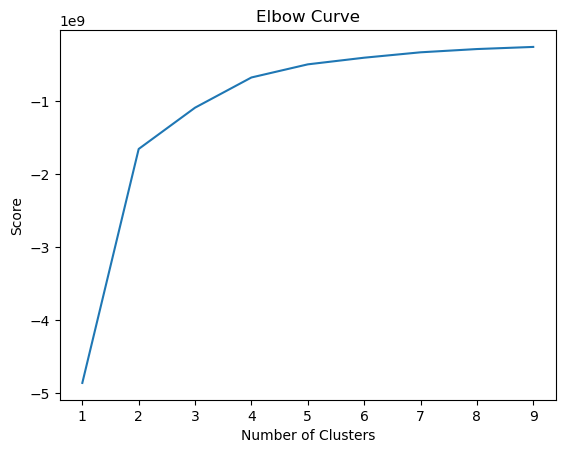

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

####  In this elbow curve, there is a large spike from two through four on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is four.

## 04. K-Means Clustering

In [17]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4)

In [18]:
# Fit the k-means object to the data.
kmeans.fit(nhl_sub)

KMeans(n_clusters=4)

In [19]:
nhl_sub['Clusters'] = kmeans.fit_predict(nhl_sub)

/var/folders/by/p0t5wv1j2qvg4mtq169k6zsr0000gn/T/ipykernel_35672/580628545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_sub['Clusters'] = kmeans.fit_predict(nhl_sub)


In [20]:
nhl_sub.head()

,Age,Games_Played,Goals,Assists,Points,Plus_Minus,Penalty_Minutes,Point_Shares,Even_Strength_Goals,Powerplay_Goals,Shorthanded_Goals,Game_Winning_Goals,Shots,Shooting_Percentage,Time_On_Ice,Avg_Time_On_Ice,Blocks,Hits,Faceoff_Wins,Faceoff_Losses,Faceoff_Percentage,Clusters
0,20,82,30,70,100,27,26,12.8,26,3,1,6,251,12.0,1733,21.133333,29.0,34,348.0,458.0,43.2,3
1,29,75,44,45,89,17,24,12.3,30,14,0,5,255,17.3,1491,19.883333,27.0,80,842.0,906.0,48.2,3
2,28,82,34,55,89,11,32,10.8,27,7,0,5,292,11.6,1754,21.400000,15.0,28,7.0,44.0,13.7,1
3,29,82,23,63,86,17,38,9.9,15,8,0,5,162,14.2,1497,18.266667,33.0,45,685.0,648.0,51.4,3
4,23,74,40,45,85,13,38,12.0,23,17,0,7,246,16.3,1438,19.433333,20.0,30,0.0,0.0,0.0,1


In [21]:
nhl_sub['Clusters'].value_counts()

2    4463
0    3719
1    3121
3     967
Name: Clusters, dtype: int64

## 05. Scatterplots

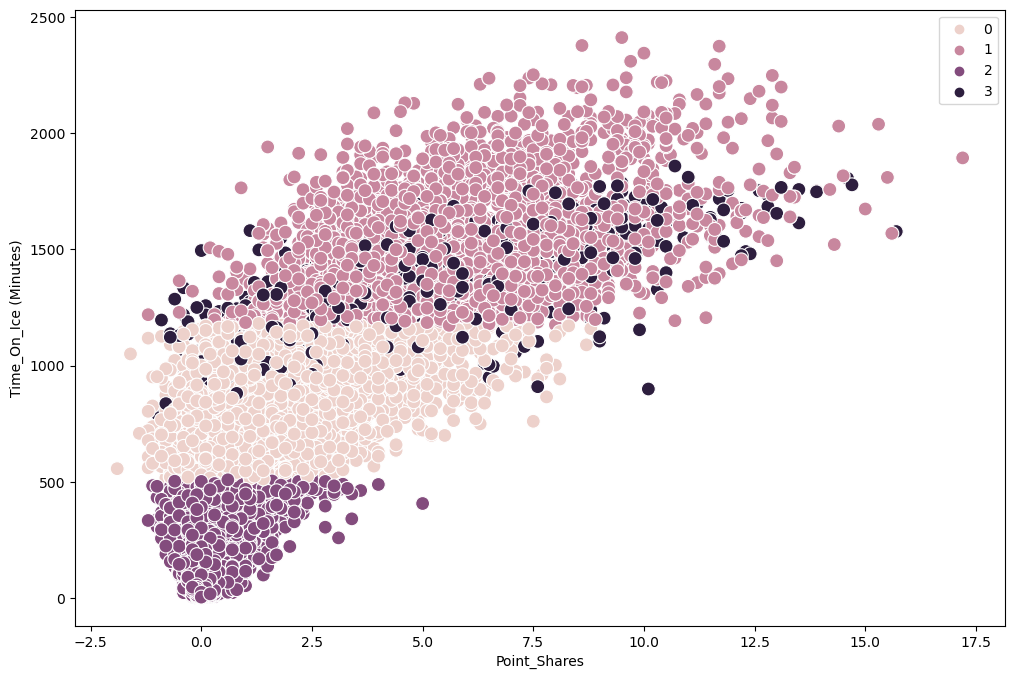

In [42]:
# Plot the clusters for the "Point_Shares" and "Time_On_Ice" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=nhl_sub['Point_Shares'], y=nhl_sub['Time_On_Ice'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Point_Shares') # Label x-axis.
plt.ylabel('Time_On_Ice (Minutes)') # Label y-axis.
plt.show()

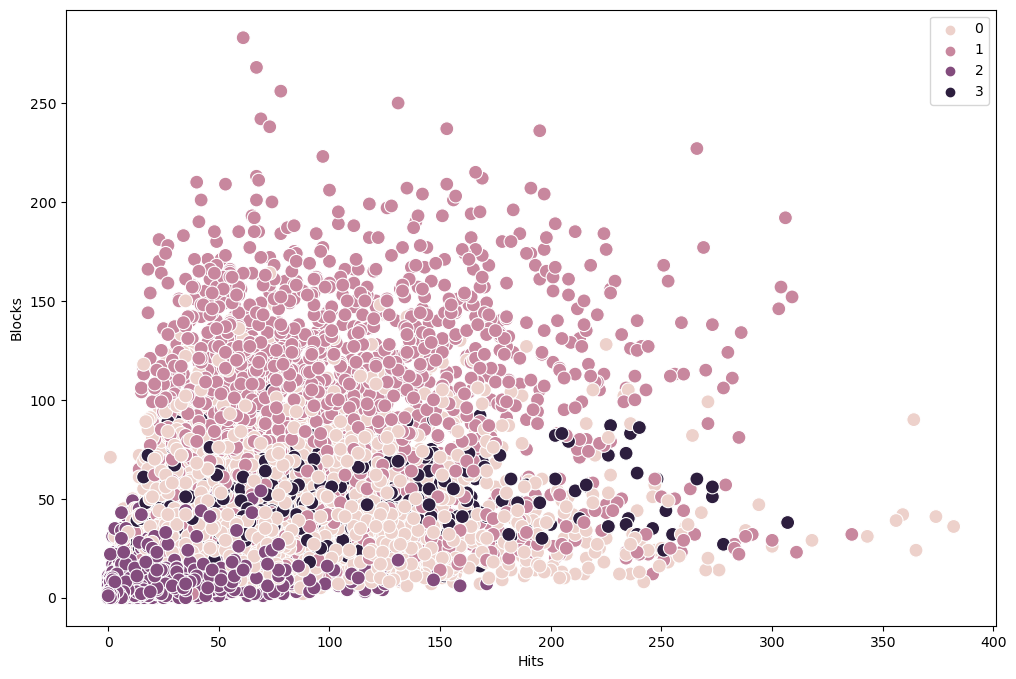

In [31]:
# Plot the clusters for the "Hits" and "Blocks" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=nhl_sub['Hits'], y=nhl_sub['Blocks'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Hits') 
plt.ylabel('Blocks') 
plt.show()

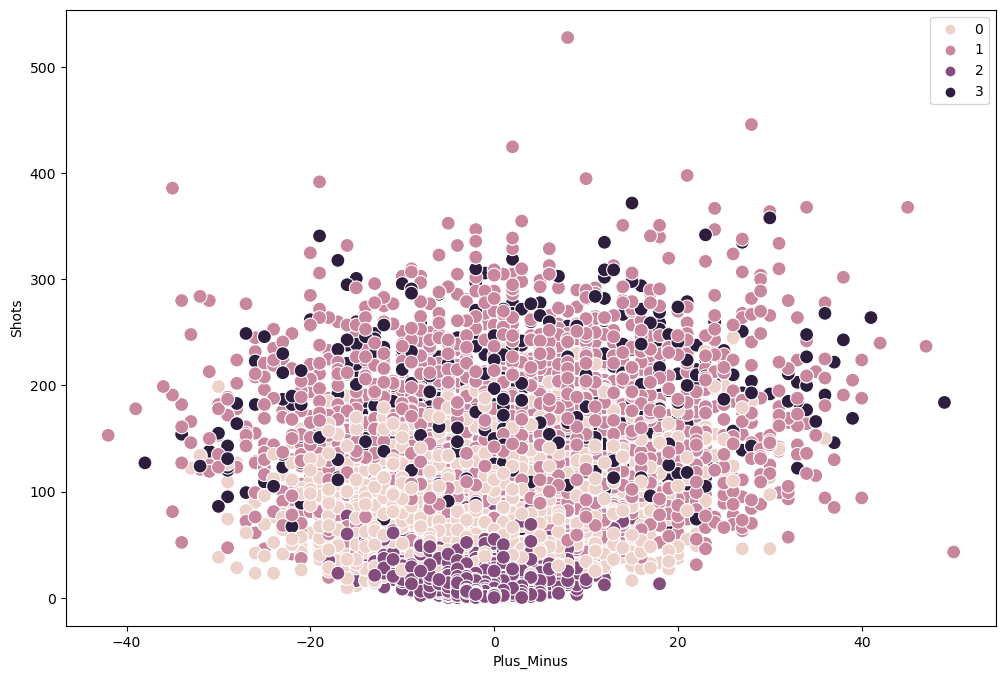

In [41]:
# Plot the clusters for the "Plus_Minus" and "Shots" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=nhl_sub['Plus_Minus'], y=nhl_sub['Shots'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Plus_Minus') 
plt.ylabel('Shots') 
plt.show()

In [44]:
nhl_sub.loc[nhl_sub['Clusters'] == 3, 'Cluster_Color'] = 'Black'
nhl_sub.loc[nhl_sub['Clusters'] == 2, 'Cluster_Color'] = 'Dark Purple'
nhl_sub.loc[nhl_sub['Clusters'] == 1, 'Cluster_Color'] = 'Purple'
nhl_sub.loc[nhl_sub['Clusters'] == 0, 'Cluster_Color'] = 'Pink'

#### The clusters on the first scatterplot make sense because the clusters 0(pink), 1(purple), 2(Dark Purple), and 3 (Black) to a certain extent group the players by ranges of 'time_on_ice' and 'point_shares'. Cluster 2 represents players with roughly -1.5 to 2.5 point shares and 0 to 500 minutes of ice time. Cluster 0 represents players with roughly -1 to 7.5 point shares and 500 to 1200 minutes of ice time. This trend continues with cluster 1 in this graph since the values will have higher point shares in a larger range and higher minutes of ice time in a larger range than the previously mentioned clusters. Cluster 3 is mixed throughout the other clusters and covers a very wide range of both variables.

#### The other two scatterplots are not as evenly divided by clusters as the first one but they still make sense, provide insights, and are similar in nature as the first scatterplot. The clusters go from bottom to top on the last two scatterplots with Cluster 2 (Dark Purple) then Cluster 0 (Pink) followed by Cluster 1(Purple). Cluster 3 (Black) is intertwined with other clusters in a wide variety of both variables but especially on the x-axis variables. 

### Descriptive Statistics

In [45]:
nhl_sub.groupby('Cluster_Color').agg({'Point_Shares':['mean', 'median'], 
                         'Time_On_Ice':['mean', 'median'], 
                         'Hits':['mean', 'median'],
                         'Blocks':['mean', 'median'],
                         'Plus_Minus':['mean', 'median'],
                          'Shots':['mean', 'median']})

Point_Shares         Time_On_Ice               Hits         \
                      mean median         mean  median       mean median   
Cluster_Color                                                              
Black             4.746432    4.4  1319.948294  1323.0  73.917270   60.0   
Dark Purple       0.226462    0.1   170.877885   119.0  15.766973    6.0   
Pink              2.035251    1.8   848.191987   852.0  61.364345   51.0   
Purple            5.599071    5.3  1514.144825  1467.0  68.148350   58.0   

                  Blocks        Plus_Minus              Shots         
                    mean median       mean median        mean median  
Cluster_Color                                                         
Black          40.860393   39.0   0.976215    1.0  155.973113  149.0  
Dark Purple     6.030921    2.0  -1.184181   -1.0   15.653596   10.0  
Pink           30.161065   24.0  -1.710406   -2.0   84.836515   80.0  
Purple         59.069849   40.0   2.032682    2.0  150.443127  145.0

#### Cluster 1(Purple) and Cluster 3 (Black) have the highest median and mean values in all variables with Purple having a slight advantage over Black in most variables. Cluster 2 (Dark Purple) has the lowest median and mean values in all variables (besides the plus_minus variable). Some variables have a large difference in cluster descriptive statistics like 'time_on_ice', 'hits', 'blocks','plus_minus', and 'shots' since many players will have limited or large roles with a team or have different playing styles that will cause extreme inputs in specific variables. 'Point_Shares' and 'Plus_Minus' don't have a big difference in descriptive statistics due to the smaller range of inputs that are possible for those variables. 

#### These results will be helpful for future steps in the analytics pipeline since you can gain insights into adjusting variables to remove extreme values and improve data bias. The results also show which clusters of inputs (players in my case) fall into certain ranges of a specific variable. For instance, I can pretty much assume correctly that players in Cluster 1 of the first scatterplot are superstar players like Sidney Crosby since they have the highest point_shares and time_on_ice values. This gives the analyst a better understanding of the dataset as well as what factors into high and low results of specific variables. In addition, these results will determine if the analyis is worth continuing or looking for more insights within these variables or if new variables should be analyized if no helpful insights were found.